# Platemaps in matplotlib

Got these down in R/ggplot2, though it would be nice to use python, and so have to figure out how to make them in matplotlib.


In [17]:
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import pandas as pd
import seaborn as sns
import string
%matplotlib inline
plt.style.use(["seaborn-ticks", "seaborn-notebook"])

### From a matrix (platemap layout)

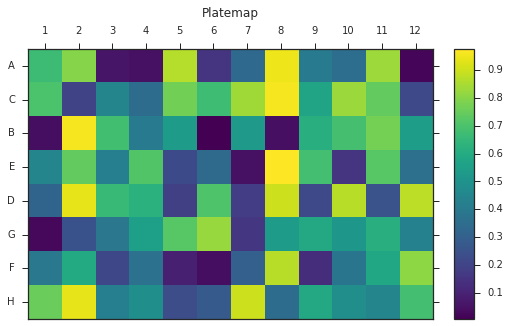

In [23]:
# create 96-well data from random numbers
mat = np.random.random((8, 12))

fig = plt.figure(figsize=[8,5])
ax = fig.add_subplot(111)

heatmap = ax.imshow(mat,
                    interpolation="nearest",
                    cmap=plt.cm.viridis)
# move xaxis labels to top of plate
ax.xaxis.set_ticks_position('top') 

# create tick labels
x_ticks = np.arange(1, mat.shape[1]+1)
y_ticks = set(string.uppercase[:mat.shape[0]])

# add tick labels
ax.xaxis.set_ticks(np.arange(mat.shape[1]))
ax.xaxis.set_ticklabels(x_ticks)
ax.yaxis.set_ticks(np.arange(mat.shape[0]))
ax.yaxis.set_ticklabels(y_ticks)
ax.set_title("Platemap", y=1.10)

# sort out colorbar position and size
divider = make_axes_locatable(ax)
cax = divider.append_axes("right", size="5%", pad=0.3)
fig.colorbar(heatmap, cax=cax)

fig.show()

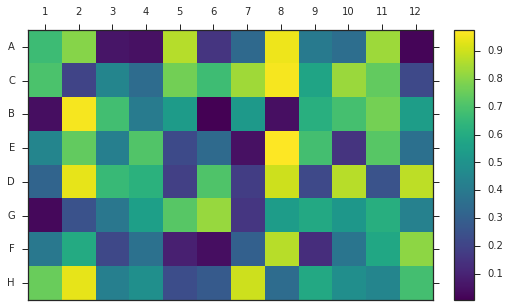

In [36]:
# make into a function that takes a matrix as input

def platemap(mat,cm = plt.cm.viridis, title = ""):
    
    fig = plt.figure(figsize=[8,5])
    ax = fig.add_subplot(111)

    heatmap = ax.imshow(mat,
                        interpolation="nearest",
                        cmap=cm)
    # move xaxis labels to top of plate
    ax.xaxis.set_ticks_position('top') 

    # create tick labels
    x_ticks = np.arange(1, mat.shape[1]+1)
    y_ticks = set(string.uppercase[:mat.shape[0]])

    # add tick labels
    ax.xaxis.set_ticks(np.arange(mat.shape[1]))
    ax.xaxis.set_ticklabels(x_ticks)
    ax.yaxis.set_ticks(np.arange(mat.shape[0]))
    ax.yaxis.set_ticklabels(y_ticks)
    ax.set_title(title, y=1.10)

    # sort out colorbar position and size
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.3)
    fig.colorbar(heatmap, cax=cax)

platemap(mat)

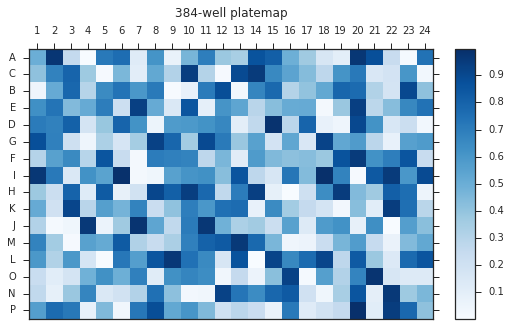

In [40]:
mat384 = np.random.random((16,24))
platemap(mat384, cm = plt.cm.Blues, title = "384-well platemap")

## From a well-label dataframe

Ideally want to pass a dataframe with a column of well labels (A01) and values to a function that produces a platemap, or multiple platemaps for multiple plates (if a column for plate identifiers is present).